# Determining Time of Concentration for Runoff in a Drainage Basin

**Time of Concentration** refers to the time required for rainfall/runoff to fully traverse a watershed to a drainage point that is the focus of a design structure.  It is generally used in conjunction with a design **Rainfall Intensity** to determine design requirements for the structure. We describe methods for calculating **time of concentration** below.  A variety of methods exist for this; we describe the Kerby-Kirpish Method that combines transit times for both overland flow (Kerby) and channel flow (Kirpish).


### The Kerby Method for Estimating *t<sub>ov</sub>* for Overland Flow

For small watersheds where overland flow is an important component of overall travel time, the Kerby method can be used. The Kerby equation is:

$\displaystyle \large t_{ov} = K (L x N)^{0.467} S^{-0.235} $

Where:

- $t_{ov}$ = overland flow time of concentration, in minutes
- K = a units conversion coefficient, in which K = 0.828 for traditional units and K = 1.44 for SI units
- L = the overland-flow length, in feet or meters as dictated by K
- N = a dimensionless retardance coefficient
- S = the dimensionless slope of terrain conveying the overland flow

The Kerby equation if valid for flow lengths of up to 1,200 feet (366 meters). Hence, this length is considered an upper limit and shorter values in practice generally are expected. The dimensionless retardance coefficient (*N*) used is similar in concept to the well-known Manning's roughness coefficient; however, for a given type of surface, the retardance coefficient for overland flow will be considerably larger than for open-channel flow. Typical values for the retardance coefficient are listed below.  If it is determined that a low slope condition exists, the user should consider using an adjusted slope in calculating the time of concentration.

| Drainage Basin Dominant Terrain Type  | Retardance Coefficient (N)|
| ------------------------------------- |:-------------:|
| Pavement                              | 0.02 |
| Smooth, bare, packed soil             | 0.10 |
| Poor grass, cultivated row crops, or moderately rough packed surfaces  | 0.20     |
| Pasture, average grass                | 0.40 |
| Deciduous forest                      | 0.60 |
| Dense grass, coniferous forest, or deciduous forest with deep litter | 0.80 |


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


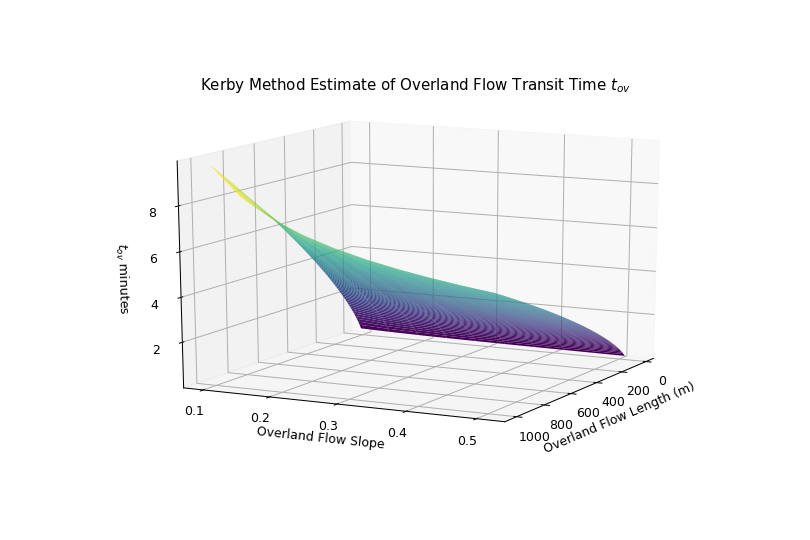

In [14]:
%matplotlib
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


#K = 0.0078  # English units
K = 0.0195  # SI

def Kerby(L, S):
    return K * np.power(L,0.770) * np.power(S,-0.385)

L = np.linspace(10, 1010, 100)
S = np.linspace(.1, .51, 10)

X, Y = np.meshgrid(L,S)
Z = Kerby(X, Y)

fig = plt.figure( figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Kerby Method Estimate of Overland Flow Transit Time $t_{ov}$');
ax.set_xlabel('Overland Flow Length (m)')
ax.set_ylabel('Overland Flow Slope')
ax.set_zlabel('$t_{ov}$ minutes');
plt.show()

### The Kirpish Method for Estimating *t<sub>ch</sub>* for Channel Flow

For channel-flow component of runoff, the Kirpich equation is:

$\displaystyle \large t_{ch} = K L^{0.770} S^{-.385} $

Where:

- $\large t_{ch}$ = the time of concentration, in minutes
- $K$ = a units conversion coefficient, in which K = 0.0078 for traditional units and K = 0.0195 for SI units
- $L$ = the channel flow length, in feet or meters as dictated by K
- $S$ = the dimensionless average main-channel slope

If it is determined that a low slope condition condition exists, the user should consider using an adjusted slope in calculating the time of concentration, as this method can fail for very low slope watersheds.

### Application of the Kerby-Kirpish Method - An example

We use the figure below to demonstrate application of the Kerby-Kirpich method. In this example we want to design a structure to handle runoff from a small watershed with a drainage area of 120 ha. (0.5 square miles.) These parameters are determined based of field observation, topo maps, or GIS-based analyses (see here). 

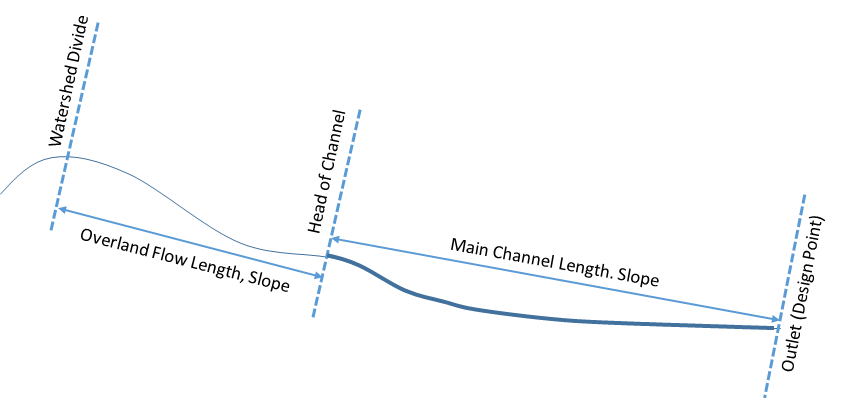

For this example we specify the following design parameters as follows:

| Input Parameter                       | Example Problem Value |
| ------------------------------------- |:---------------------:|
| length of main channel (m)            | 1.2 km (5280 ft) |
| main channel elevation change (m)     | 225 m (750 ft)   |
| representative overland flow length (m) | 150 m (500 ft) |
| overland elevation change (m)         | 3 m (10 ft) |
| retardance coefficient \n(***N*** from table, for grass)) | 0.40 | 

For the overland-flow transit times $\large t_{ov}$, we use the Kerby Equation. For estimating channel transit time $\large t_{ch}$, we apply the Kirpish eqation.  $\large t_c$ is the sum o these two terms. 

The Python code below computes the combined $\large t_c$ for the example problem.


In [5]:
import numpy as np

drainage_area = 0.5 # 120  # ha
main_channel_length = 5280
main_channel_elev = 750
overland_flow_length = 500
overland_flow_elev = 10
N = 0.40  # a dimensionless retardance coefficient, from table

main_channel_slope = main_channel_elev/main_channel_length
overland_flow_slope = overland_flow_elev/overland_flow_length

# Kerby equation for overland flow transit time
K = 0.828 # units conversion coefficient, traditional units
#K = 1.44  # units conversion coefficient, SI units

t_ov = K * np.power(overland_flow_length*N,0.467) * np.power(overland_flow_slope,-0.235)

# Kirpish equation for main channel transit time
K = 0.0078  # units conversion coefficient, traditional units
#K = 0.0195  # units conversion coefficient, SI units

t_ch = K * np.power(main_channel_length,0.770) * np.power(main_channel_slope,-.385)  # minutes

# sum gives total time of concentration
t_c = t_ov + t_ch

print("Overland Flow Transit Time (min) {:.1f}".format(t_ov))
print("Main Channel Transit Time (min) {:.1f}".format(t_ch))
print("Total Time of Concentration (min) {:.1f}".format(t_c))

Overland Flow Transit Time (min) 24.7
Main Channel Transit Time (min) 12.2
Total Time of Concentration (min) 36.8
